In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customers = pd.read_csv("https://raw.githubusercontent.com/Vignesh-ViggyPiggy/Data-Science-Assignment-eCommerce-Transactions-Dataset/refs/heads/main/Customers.csv")
df_customers

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [3]:
df_products = pd.read_csv("https://raw.githubusercontent.com/Vignesh-ViggyPiggy/Data-Science-Assignment-eCommerce-Transactions-Dataset/refs/heads/main/Products.csv")
df_products

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [4]:
df_transactions = pd.read_csv("https://raw.githubusercontent.com/Vignesh-ViggyPiggy/Data-Science-Assignment-eCommerce-Transactions-Dataset/refs/heads/main/Transactions.csv")
df_transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [5]:
df_transactions[df_transactions["ProductID"]== "P001"	]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
644,T00088,C0019,P001,2024-01-30 17:23:03,2,338.6,169.3
645,T00314,C0024,P001,2024-09-24 17:15:16,4,677.2,169.3
646,T00428,C0071,P001,2024-08-02 08:13:23,2,338.6,169.3
647,T00433,C0036,P001,2024-05-05 05:01:18,2,338.6,169.3
648,T00449,C0191,P001,2024-12-12 12:17:38,1,169.3,169.3
649,T00545,C0105,P001,2024-06-24 10:10:17,2,338.6,169.3
650,T00732,C0045,P001,2024-08-13 10:42:48,2,338.6,169.3
651,T00758,C0017,P001,2024-05-28 14:47:15,3,507.9,169.3


In [6]:
df_temp = pd.merge(df_transactions,df_customers,on = "CustomerID",how="inner" )
df = pd.merge(df_temp,df_products,on = "ProductID",how = "inner")
df = df.drop("Price_y",axis=1)
df = df.rename(columns={"Price_x":"Price"})
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


<Axes: >

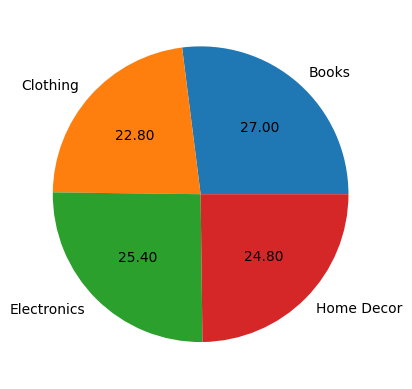

In [8]:
df.groupby("Category").size().plot(kind="pie", autopct='%.2f')


<Axes: >

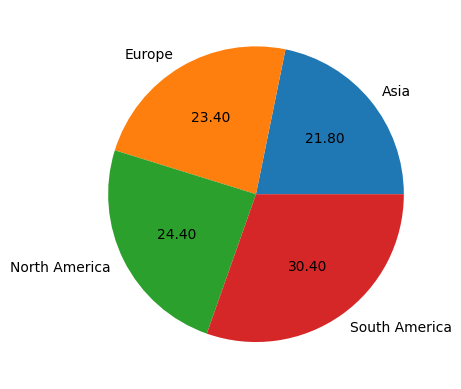

In [9]:
df.groupby("Region").size().plot(kind="pie", autopct='%.2f')

<Axes: >

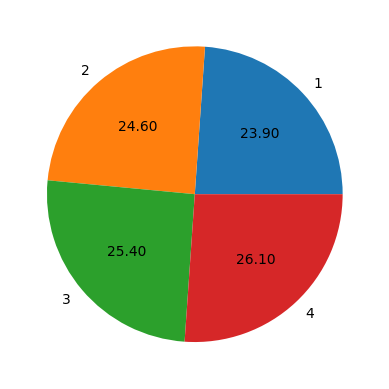

In [10]:
df.groupby("Quantity").size().plot(kind="pie", autopct='%.2f')

<Axes: ylabel='count'>

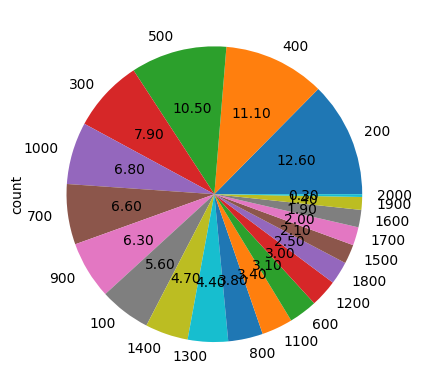

In [11]:
totalValue = df["TotalValue"]
totalValueCategorical = pd.cut(x=totalValue, bins=range(0,int(totalValue.max())+100,100),labels=range(100,int(totalValue.max())+100,100))
df["totalValueCategorical"] = totalValueCategorical
totalValueCategorical.value_counts().plot(kind="pie", autopct='%.2f')



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   TransactionID          1000 non-null   object  
 1   CustomerID             1000 non-null   object  
 2   ProductID              1000 non-null   object  
 3   TransactionDate        1000 non-null   object  
 4   Quantity               1000 non-null   int64   
 5   TotalValue             1000 non-null   float64 
 6   Price                  1000 non-null   float64 
 7   CustomerName           1000 non-null   object  
 8   Region                 1000 non-null   object  
 9   SignupDate             1000 non-null   object  
 10  ProductName            1000 non-null   object  
 11  Category               1000 non-null   object  
 12  totalValueCategorical  1000 non-null   category
dtypes: category(1), float64(2), int64(1), object(9)
memory usage: 95.0+ KB


In [13]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['SignupDate'] = pd.to_datetime(df['SignupDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TransactionID          1000 non-null   object        
 1   CustomerID             1000 non-null   object        
 2   ProductID              1000 non-null   object        
 3   TransactionDate        1000 non-null   datetime64[ns]
 4   Quantity               1000 non-null   int64         
 5   TotalValue             1000 non-null   float64       
 6   Price                  1000 non-null   float64       
 7   CustomerName           1000 non-null   object        
 8   Region                 1000 non-null   object        
 9   SignupDate             1000 non-null   datetime64[ns]
 10  ProductName            1000 non-null   object        
 11  Category               1000 non-null   object        
 12  totalValueCategorical  1000 non-null   category      
dtypes: c

In [14]:
df['CustomerTenure'] = (df['TransactionDate'] - df['SignupDate']).dt.days
df['CustomerTenure'] = df['CustomerTenure'].apply(lambda x: x if x >= 0 else 0)
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,totalValueCategorical,CustomerTenure
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,400,631
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,400,0
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,400,21
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,700,0
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,1000,737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,500,1006
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,1400,58
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,1900,0
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,1000,0


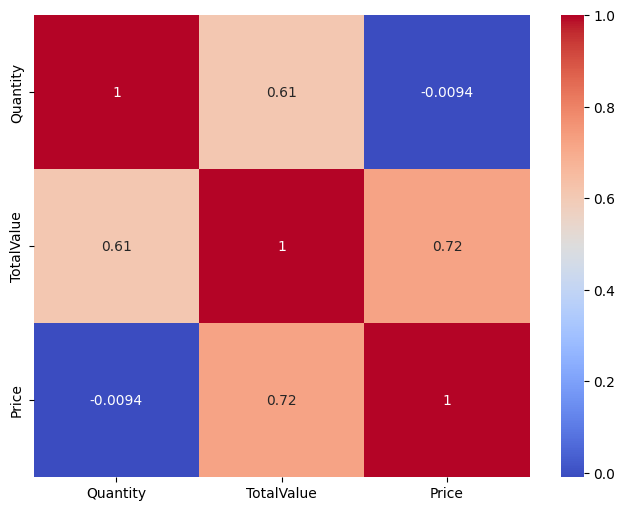

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap="coolwarm")
plt.show()

##Inference:
* Since TotalValue is strongly influenced by Price, businesses could experiment with dynamic pricing to optimize revenue.

* Quantity and Price are uncorrelated, meaning bulk purchases may not be price-sensitive, which could indicate a need for volume-based discounts to drive larger purchases.

* Strong Quantity–TotalValue correlation suggests that increasing purchase volume (e.g., through promotions) could effectively boost revenue.

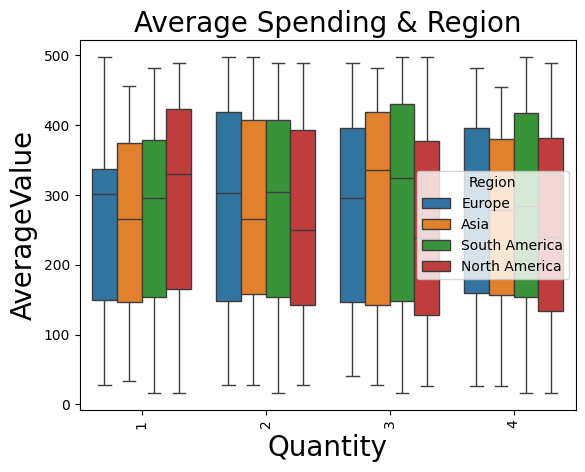

In [16]:
a=sns.boxplot(x=df['Quantity'],y=df['TotalValue']/df["Quantity"], hue=df['Region'])
a.axes.set_title("Average Spending & Region",fontsize=20)
a.set_xlabel("Quantity",fontsize=20)
a.set_ylabel("AverageValue",fontsize=20)
plt.xticks(rotation=90)
plt.show()

##Key Observations:
###Spending Distribution Across Quantities:

* The median AverageValue increases slightly as Quantity increases.

* There is a wide range of spending (large interquartile range), meaning some customers spend significantly more or less even for the same quantity.

###Regional Spending Differences:

* North America & Asia have higher median spending compared to Europe and South America.

* South America shows more variability in spending (wider interquartile range).

* Europe has the lowest median spending, suggesting customers in this region tend to spend less on average.

###Outliers & Variability:

* The whiskers (error bars) extend widely, showing high variability in customer spending.

* Some regions have higher spending outliers, meaning a few customers spend significantly more than the average.

###Business Implications:

* North America & Asia are high-value regions; targeted marketing could boost revenue further.

* Europe and South America have lower spending; discounts or promotions might encourage higher spending.

* High variability in spending suggests
segmentation is needed—some customers buy in bulk, while others make small purchases.

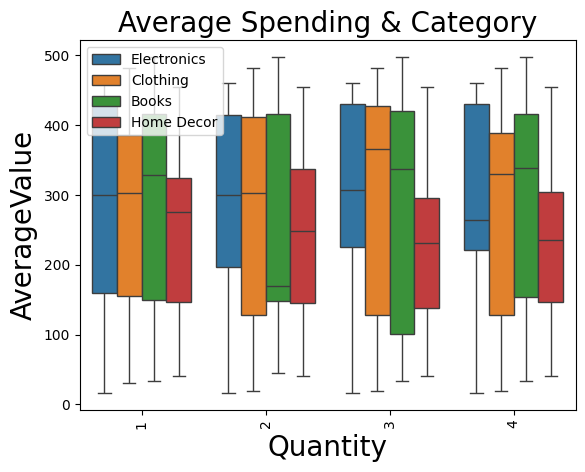

In [17]:
a=sns.boxplot(x=df['Quantity'],y=df['TotalValue']/df["Quantity"], hue=df['Category'])
a.axes.set_title("Average Spending & Category",fontsize=20)
a.set_xlabel("Quantity",fontsize=20)
a.set_ylabel("AverageValue",fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

##Key Observations:
###Spending Trends Across Categories:

* Electronics & Books have higher median spending compared to Clothing and Home Decor.

* Home Decor has the lowest median spending, indicating that customers tend to spend less on these items.

* Spending for Clothing and Books is more evenly distributed.

###Impact of Quantity on Spending:

* Across all categories, spending increases slightly with quantity, but there is significant variation.

* Electronics & Books show the highest variability—some customers spend significantly more on a few high-value items.


###Outliers & Variability:

* Electronics has the widest range, meaning some customers purchase expensive items while others spend much less.

* Home Decor has less variability, suggesting that most purchases are within a limited price range.

* Some outliers exist, particularly in Books and Electronics, where certain transactions have much higher spending.

###Business Implications:
* Electronics and Books are high-value categories—promotions targeting these categories could yield high revenue.

* Home Decor might need pricing adjustments or bundled offers to increase its spending range.

* Discounts on Clothing & Home Decor could encourage higher spending, given their relatively lower median values.

* Bulk purchase incentives for Electronics & Books might attract high-spending customers.

In [19]:
transaction_frequency = df.groupby("CustomerID")["TransactionID"].nunique().reset_index()
transaction_frequency.rename(columns={"TransactionID": "TransactionFrequency"}, inplace=True)

latest_date = df["TransactionDate"].max()
recency = df.groupby("CustomerID")["TransactionDate"].max().reset_index()
recency["Recency"] = (latest_date - recency["TransactionDate"]).dt.days
customer_features = df.merge(transaction_frequency, on="CustomerID")
customer_features = customer_features.merge(recency, on="CustomerID")
customer_features = customer_features.drop("TransactionDate_y",axis=1)
customer_features = customer_features.rename(columns={"TransactionDate_x":"TransactionDate"})
customer_features

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,totalValueCategorical,CustomerTenure,TransactionFrequency,Recency
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,400,631,4,63
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,400,0,4,9
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,400,21,6,99
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,700,0,7,105
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,1000,737,4,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,500,1006,6,10
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,1400,58,8,65
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,1900,0,5,146
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,1000,0,3,5


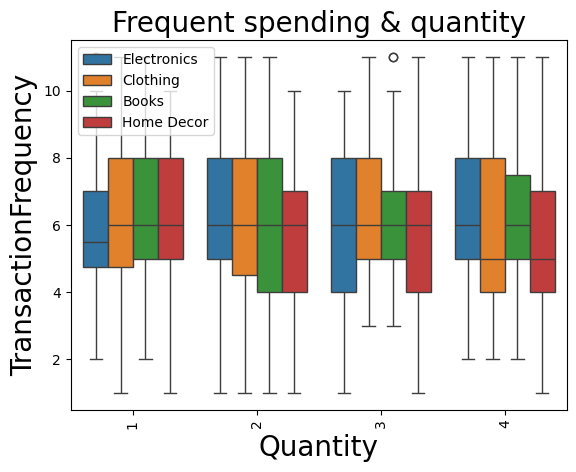

In [21]:
a=sns.boxplot(x=customer_features['Quantity'],y=customer_features['TransactionFrequency'], hue=df['Category'])
a.axes.set_title("Frequent spending & quantity",fontsize=20)
a.set_xlabel("Quantity",fontsize=20)
a.set_ylabel("TransactionFrequency",fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

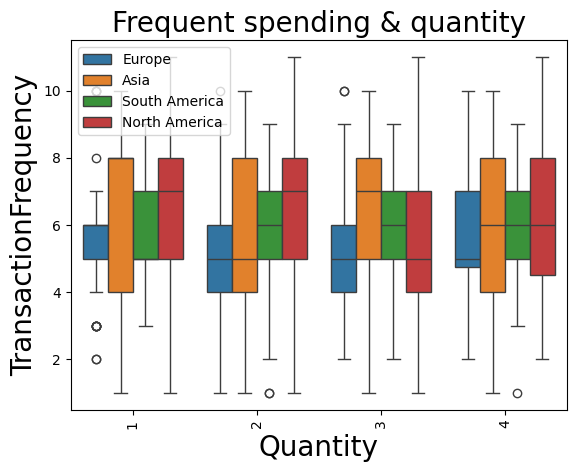

In [22]:
a=sns.boxplot(x=customer_features['Quantity'],y=customer_features['TransactionFrequency'], hue=df['Region'])
a.axes.set_title("Frequent spending & quantity",fontsize=20)
a.set_xlabel("Quantity",fontsize=20)
a.set_ylabel("TransactionFrequency",fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()